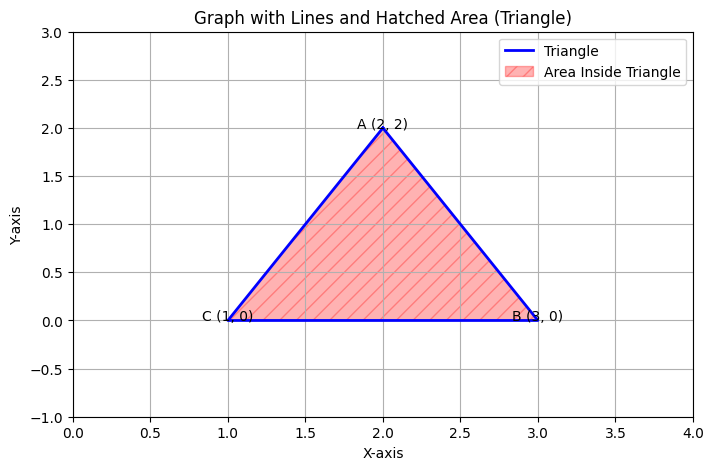

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vertices of the triangle
A = (2, 2)
B = (3, 0)
C = (1, 0)

# Extract x and y coordinates of the vertices
x = [A[0], B[0], C[0], A[0]]
y = [A[1], B[1], C[1], A[1]]

# Plot the triangle
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', label='Triangle', linewidth=2)

# Fill the triangle with a hatched pattern
plt.fill(x[:-1], y[:-1], color='red', alpha=0.3, hatch='//', label='Area Inside Triangle')

# Annotate the points
plt.text(A[0], A[1], 'A (2, 2)', fontsize=10, ha='center')
plt.text(B[0], B[1], 'B (3, 0)', fontsize=10, ha='center')
plt.text(C[0], C[1], 'C (1, 0)', fontsize=10, ha='center')

# Add labels, legend, and grid
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph with Lines and Hatched Area (Triangle)')
plt.legend()
plt.grid(True)

# Set axis limits for better visualization
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Show the plot
plt.show()

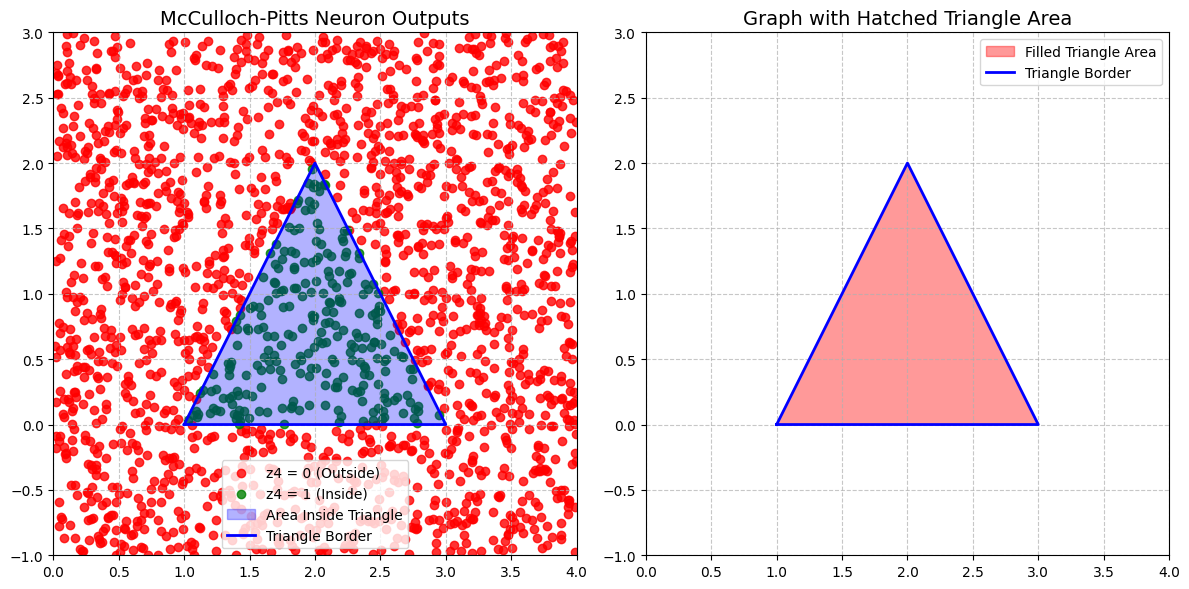

Triangle vertices:
C: (1, 0)
A: (2, 2)
B: (3, 0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define triangle vertices
vertices = np.array([[1, 0], [2, 2], [3, 0]])

def is_inside_triangle(point, vertices):
    """Check if a point is inside the triangle using barycentric coordinates"""
    def area(x1, y1, x2, y2, x3, y3):
        return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)) / 2.0)

    # Calculate areas
    A = area(vertices[0,0], vertices[0,1], vertices[1,0], vertices[1,1], vertices[2,0], vertices[2,1])
    A1 = area(point[0], point[1], vertices[1,0], vertices[1,1], vertices[2,0], vertices[2,1])
    A2 = area(vertices[0,0], vertices[0,1], point[0], point[1], vertices[2,0], vertices[2,1])
    A3 = area(vertices[0,0], vertices[0,1], vertices[1,0], vertices[1,1], point[0], point[1])

    # Calculate barycentric coordinates
    s = A1/A
    t = A2/A
    u = A3/A

    # Check if point is inside
    return (0 <= s <= 1) and (0 <= t <= 1) and (0 <= u <= 1) and (abs(s + t + u - 1.0) < 1e-10)

# Generate random points
np.random.seed(42)  # For reproducibility
num_points = 2000
x = np.random.uniform(0, 4, num_points)
y = np.random.uniform(-1, 3, num_points)
points = np.column_stack((x, y))

# Classify points
classifications = np.array([1 if is_inside_triangle(point, vertices) else 0 for point in points])

# Create the plot
plt.figure(figsize=(12, 6))

# First subplot - Points classification
plt.subplot(1, 2, 1)
plt.title('McCulloch-Pitts Neuron Outputs', fontsize=14)
plt.scatter(x[classifications == 0], y[classifications == 0], c='red', label='z4 = 0 (Outside)', alpha=0.8)
plt.scatter(x[classifications == 1], y[classifications == 1], c='green', label='z4 = 1 (Inside)', alpha=0.8)

# Draw triangle
triangle = plt.Polygon(vertices, fill=True, alpha=0.3, color='blue', label='Area Inside Triangle')
plt.gca().add_patch(triangle)
plt.plot(np.append(vertices[:,0], vertices[0,0]),
         np.append(vertices[:,1], vertices[0,1]), 'b-', linewidth=2, label='Triangle Border')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Second subplot - Triangle outline
plt.subplot(1, 2, 2)
plt.title('Graph with Hatched Triangle Area', fontsize=14)
triangle = plt.Polygon(vertices, fill=True, alpha=0.4, color='red', label='Filled Triangle Area')
plt.gca().add_patch(triangle)
plt.plot(np.append(vertices[:,0], vertices[0,0]),
         np.append(vertices[:,1], vertices[0,1]), 'b-', linewidth=2, label='Triangle Border')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xlim(0, 4)
plt.ylim(-1, 3)

plt.tight_layout()
plt.show()

# Print vertex coordinates for reference
print("Triangle vertices:")
print(f"C: ({vertices[0,0]}, {vertices[0,1]})")
print(f"A: ({vertices[1,0]}, {vertices[1,1]})")
print(f"B: ({vertices[2,0]}, {vertices[2,1]})")

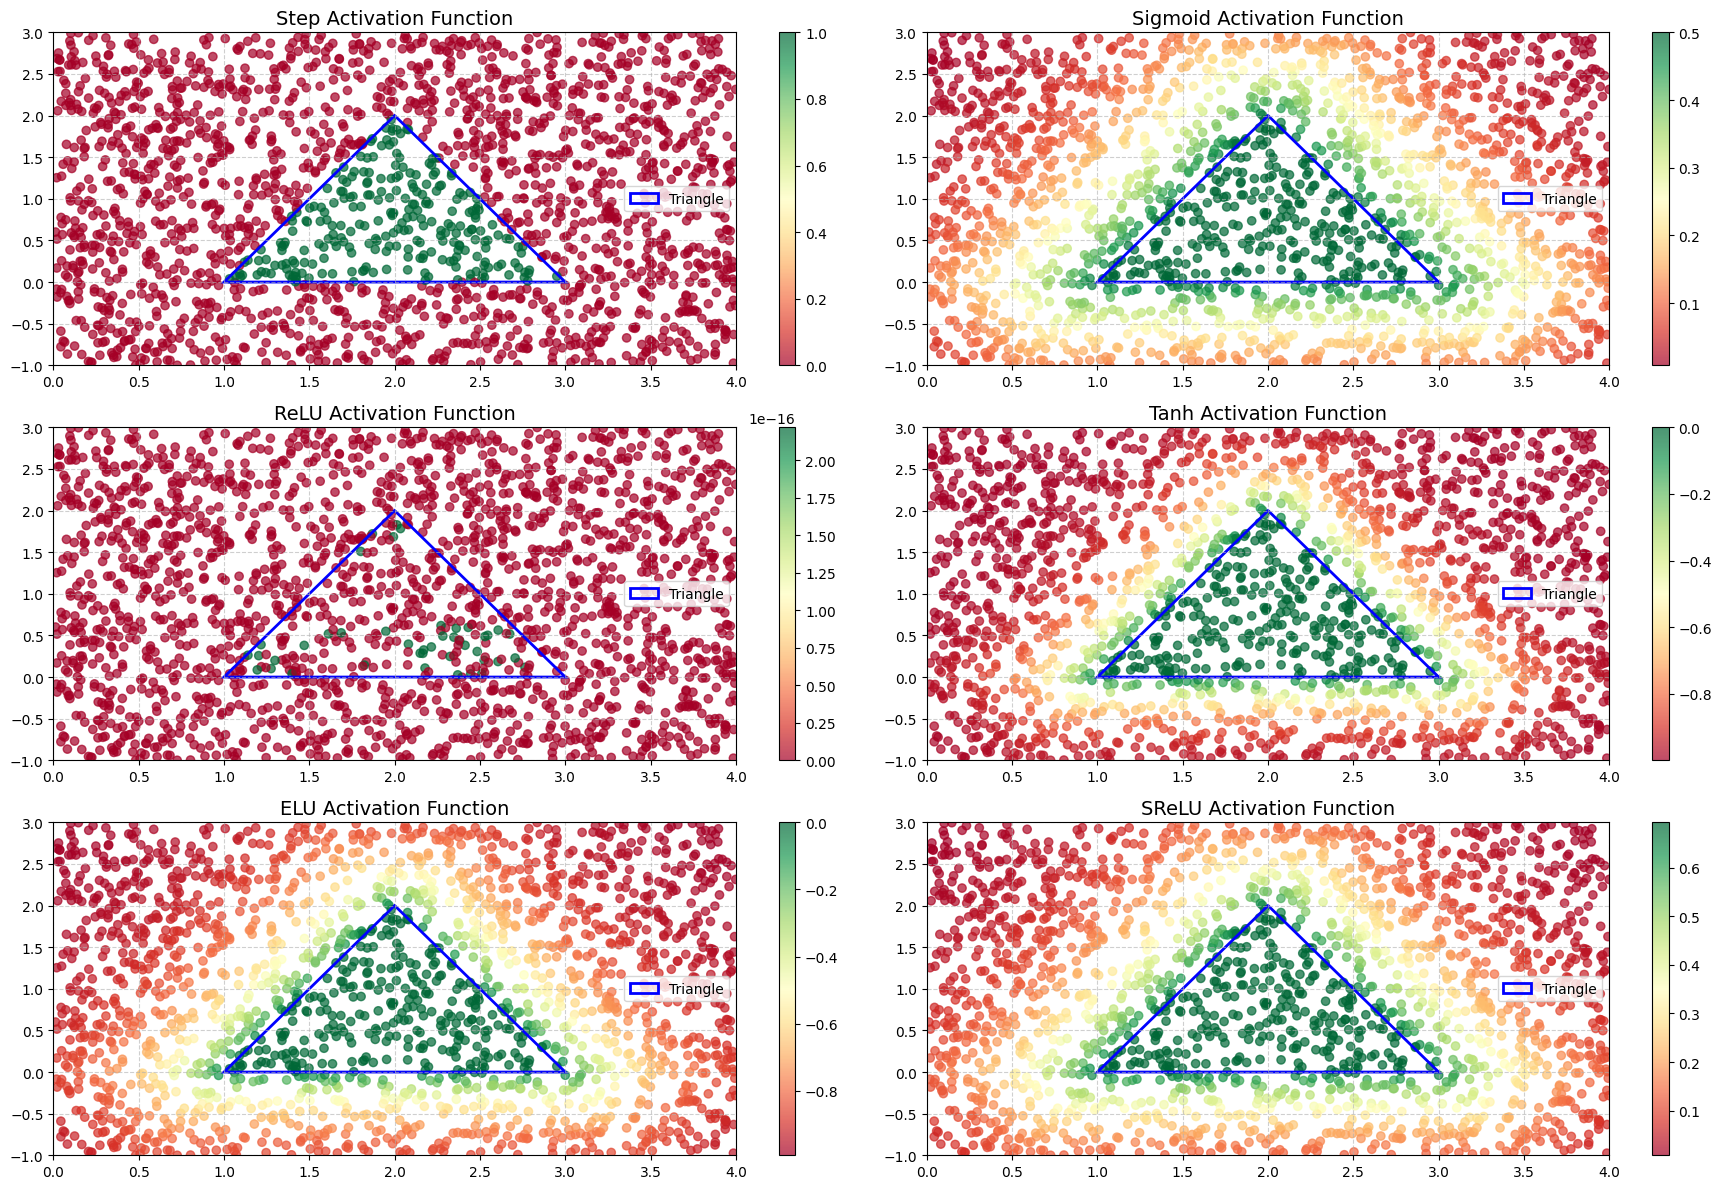


Analysis of Different Activation Functions:
--------------------------------------------------

Step Activation Function:
Points classified as inside triangle: 253
Points classified as outside triangle: 1747

Sigmoid Activation Function:
Points classified as inside triangle: 43
Points classified as outside triangle: 1957
Average activation value: 0.227
Maximum activation value: 0.500
Minimum activation value: 0.008

ReLU Activation Function:
Points classified as inside triangle: 0
Points classified as outside triangle: 2000
Average activation value: 0.000
Maximum activation value: 0.000
Minimum activation value: 0.000

Tanh Activation Function:
Points classified as inside triangle: 0
Points classified as outside triangle: 2000
Average activation value: -0.712
Maximum activation value: 0.000
Minimum activation value: -1.000

ELU Activation Function:
Points classified as inside triangle: 0
Points classified as outside triangle: 2000
Average activation value: -0.639
Maximum activation va

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def step_activation(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return np.maximum(0, x)

def tanh_activation(x):
    return np.tanh(x)

def elu_activation(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def srelu_activation(x):
    return np.log(1 + np.exp(x))  # Softplus approximation of ReLU

# Define triangle vertices
vertices = np.array([[1, 0], [2, 2], [3, 0]])

def is_inside_triangle(point, vertices):
    """Check if a point is inside the triangle using barycentric coordinates"""
    def area(x1, y1, x2, y2, x3, y3):
        return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)) / 2.0)

    A = area(vertices[0,0], vertices[0,1], vertices[1,0], vertices[1,1], vertices[2,0], vertices[2,1])
    A1 = area(point[0], point[1], vertices[1,0], vertices[1,1], vertices[2,0], vertices[2,1])
    A2 = area(vertices[0,0], vertices[0,1], point[0], point[1], vertices[2,0], vertices[2,1])
    A3 = area(vertices[0,0], vertices[0,1], vertices[1,0], vertices[1,1], point[0], point[1])

    # Calculate decision value
    decision_value = A - (A1 + A2 + A3)
    return decision_value

# Generate random points
np.random.seed(42)
num_points = 2000
x = np.random.uniform(0, 4, num_points)
y = np.random.uniform(-1, 3, num_points)
points = np.column_stack((x, y))

# Calculate decision values for all points
decision_values = np.array([is_inside_triangle(point, vertices) for point in points])

# Create plots for different activation functions
activation_functions = {
    'Step': step_activation,
    'Sigmoid': sigmoid_activation,
    'ReLU': relu_activation,
    'Tanh': tanh_activation,
    'ELU': elu_activation,
    'SReLU': srelu_activation
}

plt.figure(figsize=(18, 12))

for idx, (name, activation_fn) in enumerate(activation_functions.items(), 1):
    # Apply activation function
    classifications = activation_fn(decision_values)

    plt.subplot(3, 2, idx)
    plt.title(f'{name} Activation Function', fontsize=14)

    # Plot points with continuous color mapping
    scatter = plt.scatter(x, y, c=classifications, cmap='RdYlGn', alpha=0.7)
    plt.colorbar(scatter)

    # Draw triangle
    triangle = plt.Polygon(vertices, fill=False, color='blue', linewidth=2, label='Triangle')
    plt.gca().add_patch(triangle)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.xlim(0, 4)
    plt.ylim(-1, 3)

plt.tight_layout()
plt.show()

# Print analysis of different activation functions
print("\nAnalysis of Different Activation Functions:")
print("-" * 50)
for name, activation_fn in activation_functions.items():
    classifications = activation_fn(decision_values)
    inside_points = np.sum(classifications > 0.5)
    print(f"\n{name} Activation Function:")
    print(f"Points classified as inside triangle: {inside_points}")
    print(f"Points classified as outside triangle: {num_points - inside_points}")
    if name != 'Step':
        print(f"Average activation value: {np.mean(classifications):.3f}")
        print(f"Maximum activation value: {np.max(classifications):.3f}")
        print(f"Minimum activation value: {np.min(classifications):.3f}")